In [40]:
# Import pustaka yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn import tree
import matplotlib.pyplot as plt

In [41]:
# Memuat dataset
file_path = '/content/CreditDataset.csv'
data = pd.read_csv(file_path)

In [42]:
# Encode variabel kategori menggunakan LabelEncoder
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

In [43]:
# Memisahkan fitur (X) dan target (y)
X = data.drop('Class', axis=1)  # Fitur (variabel independen)
y = data['Class']  # Target (variabel dependen)

In [44]:
# Membagi dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Melatih model Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
# Melatih model k-NN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
# Melakukan prediksi dengan Decision Tree
y_pred_tree = decision_tree_model.predict(X_test)

# Melakukan prediksi dengan k-NN
y_pred_knn = knn_model.predict(X_test)


In [48]:
# Menampilkan laporan klasifikasi dan akurasi untuk Decision Tree
print("Laporan Klasifikasi Decision Tree:\n", classification_report(y_test, y_pred_tree))
print("Akurasi Decision Tree:", accuracy_score(y_test, y_pred_tree))

# Menampilkan laporan klasifikasi dan akurasi untuk k-NN
print("Laporan Klasifikasi k-NN:\n", classification_report(y_test, y_pred_knn))
print("Akurasi k-NN:", accuracy_score(y_test, y_pred_knn))

Laporan Klasifikasi Decision Tree:
               precision    recall  f1-score   support

           1       0.78      0.87      0.82       141
           2       0.56      0.41      0.47        59

    accuracy                           0.73       200
   macro avg       0.67      0.64      0.64       200
weighted avg       0.71      0.73      0.72       200

Akurasi Decision Tree: 0.73
Laporan Klasifikasi k-NN:
               precision    recall  f1-score   support

           1       0.73      0.87      0.80       141
           2       0.44      0.24      0.31        59

    accuracy                           0.69       200
   macro avg       0.58      0.55      0.55       200
weighted avg       0.65      0.69      0.65       200

Akurasi k-NN: 0.685


In [49]:
# Menghitung AUC-ROC untuk Decision Tree dengan pos_label diatur ke 2
y_prob_tree = decision_tree_model.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree, pos_label=2)
auc_tree = roc_auc_score(y_test, y_prob_tree)

In [50]:
# Menghitung AUC-ROC untuk k-NN dengan pos_label diatur ke 2
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn, pos_label=2)
auc_knn = roc_auc_score(y_test, y_prob_knn)

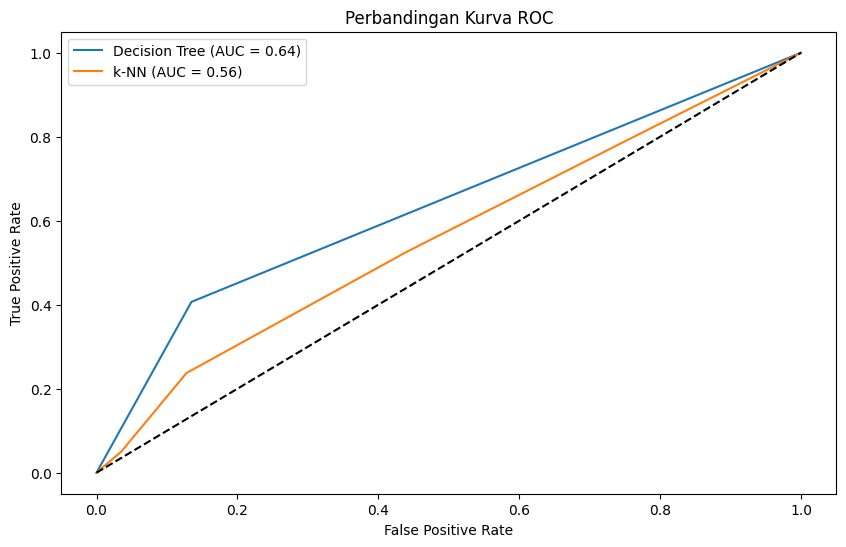

In [51]:
# Plot kurva ROC untuk kedua model
plt.figure(figsize=(10, 6))
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'k-NN (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Garis acak untuk pembanding
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Perbandingan Kurva ROC')
plt.legend()
plt.show()


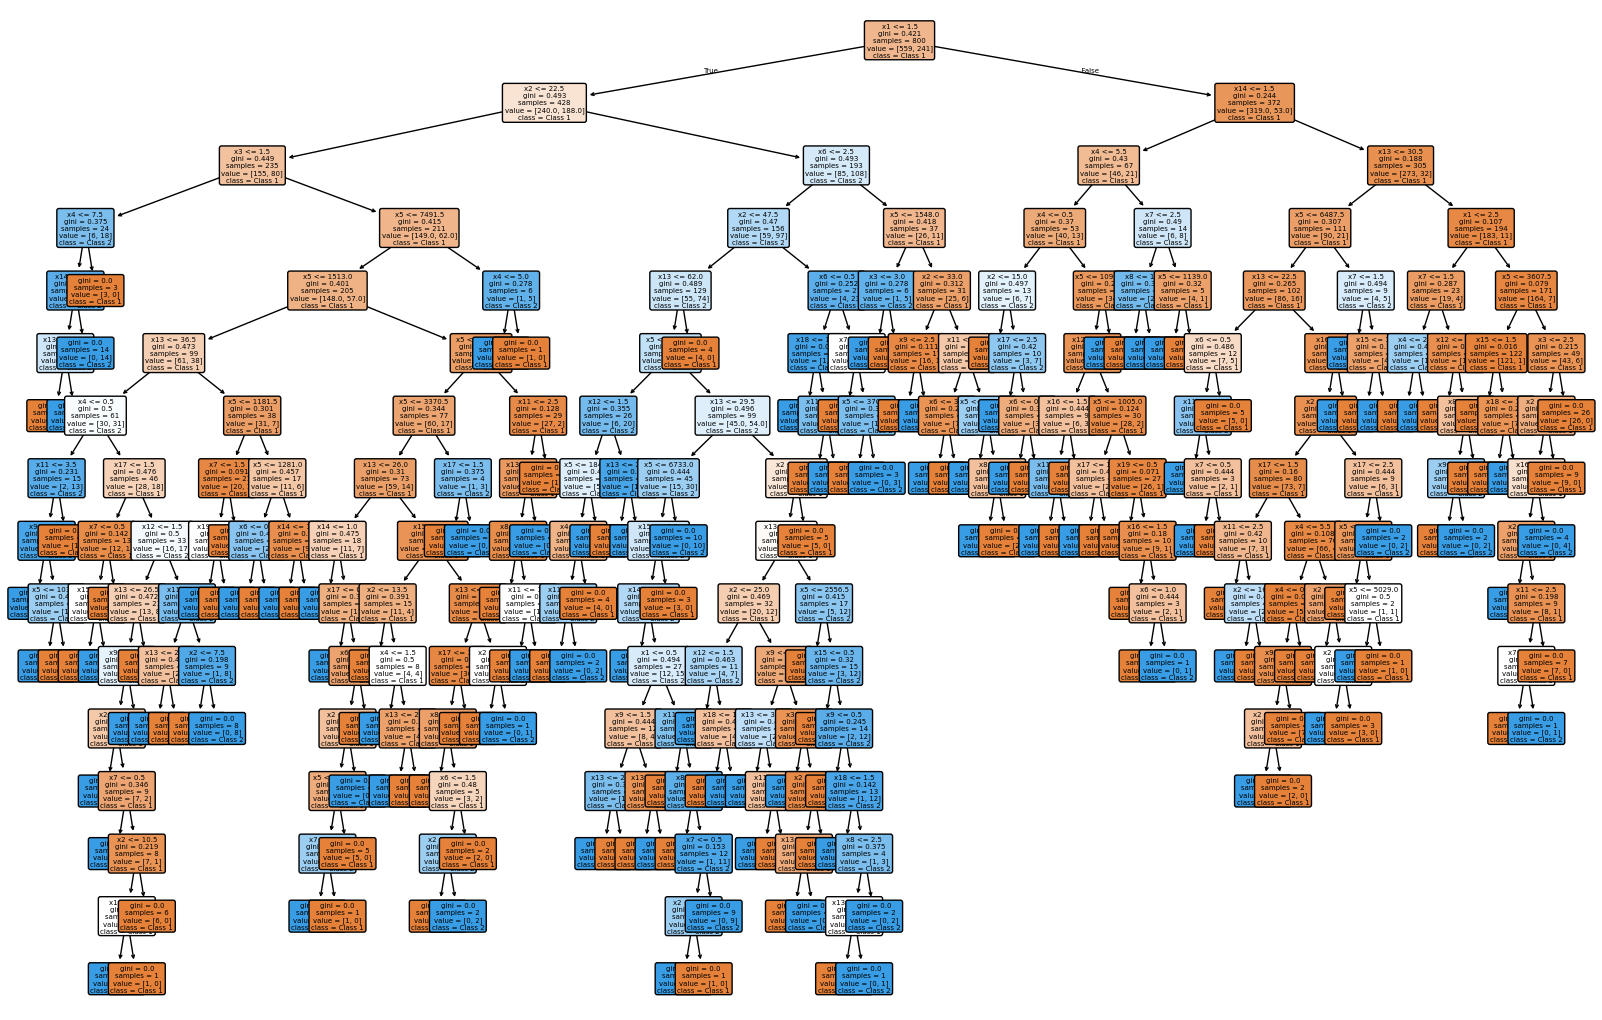

In [32]:
# Mengatur ukuran gambar dan DPI agar lebih mudah dibaca
plt.figure(figsize=(20, 13), dpi=100)  # Mengatur DPI agar lebih jelas

# Memvisualisasikan decision tree dengan peningkatan keterbacaan
tree.plot_tree(decision_tree_model,
               feature_names=X.columns,  # Nama fitur untuk label
               class_names=['Class 1', 'Class 2'],  # Nama kelas target
               filled=True,  # Warna node untuk membedakan kelas
               rounded=True,  # Node dengan sudut membulat agar lebih jelas
               fontsize=3)  # Mengatur ukuran font agar mudah dibaca

plt.show()